In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
print(df.head(5))

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


One-hot-encodeamos "Extracurricular Activities" ya que no nos sirven las features categóricas y separamos el dataframe en X e y (siendo y nuestra variable target).

In [16]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['Extracurricular Activities']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Extracurricular Activities']))
df_encoded = pd.concat([df.drop(columns=['Extracurricular Activities']), encoded_df], axis=1)

X = df_encoded.drop(columns=["Performance Index"])
y = df["Performance Index"]

Dividimos train y test y creamos el modelo.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
model = LinearRegression()

Entrenamos el modelo.

In [21]:
model.fit(X_train, y_train)

LinearRegression()

Evaluamos nuestro modelo con el set de prueba previamente aislado.

In [22]:
y_pred = model.predict(X_test)

Generamos métricas para verificar si nuestro modelo está bien.

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 4.04
Mean Absolute Error (MAE): 1.59
R² Score: 0.99


Analizando las métricas, lo primero que salta a la vista es que R2 es casi 1, lo cual a primera impresión es muy bueno. 

Luego, graficamos para visualizar qué tan buenas fueron nuestras predicciones:

La línea roja punteada es la recta $y = x$.

En el eje x posicionamos y_test, es decir, los datos **reales**. En el eje y tenemos a y_pred, los datos que predijimos en base a X_test. Esto puede ser algo confuso, pero lo que buscamos es analizar qué tan cerca están estos puntos de la línea punteada, es decir, qué tan cerca están un dato real y un dato predicho de ser iguales ($y = x$). Esta es una forma sencilla y visual de verificar qué tan bueno es nuestro modelo.

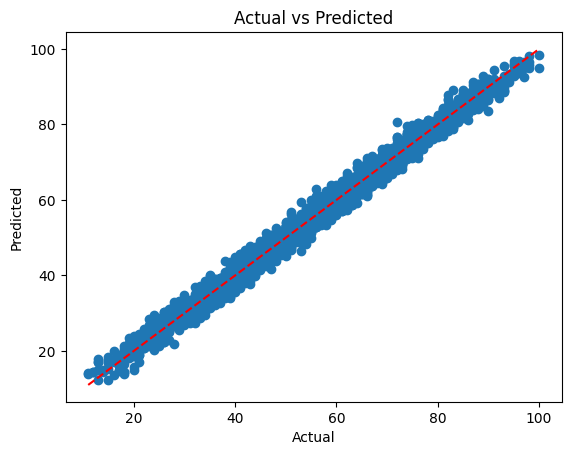

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
